# Imports and Dependencies
Start your notebook by importing any necessary libraries and dependencies that you'll need throughout your code. This could include things like NumPy, Pandas, scikit-learn, or TensorFlow.

In [1]:
#conda install scikit-learn

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn import metrics, model_selection, tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# from pandas_profiling import ProfileReport
# test 

import random
import torch
from torch import nn, optim
import math
from IPython import display
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
!pip show torch

Name: torch
Version: 2.0.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /opt/anaconda3/envs/cs473/lib/python3.11/site-packages
Requires: filelock, jinja2, networkx, sympy, typing-extensions
Required-by: 


In [3]:
import random
random.seed(12289065)

# Data Preparation
Load your dataset into memory, and perform any necessary preprocessing steps. This might include tasks like cleaning the data, handling missing values, feature scaling, encoding categorical variables, and so on.

In [4]:
# Loading the dataset into a Pandas Dataframe 
df = pd.read_csv("musicData.csv") 
df = df.drop(columns=['artist_name','track_name'])

In [5]:
# Identify target variable column and separate it from features
target_col = 'music_genre'
# y = df[target_col]
X = df.drop(columns=[target_col])

In [6]:
# Overview of the data 
# ProfileReport(df)

In [7]:
# let's quickly preview the dataset
df
df.head()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [8]:
print(df.shape)

(50005, 16)


Some preliminary cleaning before visualizing your data to ensure that the visualizations accurately reflect the data you have. For example, you may want to remove or impute any missing data before visualizing the distributions of the acoustic features. Additionally, you may want to transform the categorical data into numerical data before exploring relationships between features.

### Checking for outliers

A scatter plot matrix can be a good way to visualize the relationship between multiple predictors and identify outliers. In a scatter plot matrix, each predictor is plotted against all other predictors in the form of scatter plots. Outliers will be visible as points that fall outside the general pattern of the data.
Indeed, exploring the pairwise relationships between the features can be a useful step in preparing the data for classification, even if the ultimate goal is to classify the genre of music.

In [9]:
# Use Seaborn to create a scatter matrix plot
# sns.pairplot(df, hue='music_genre')

### Handling missing data
There is randomly missing data, e.g. some of the durations of some of the songs are missing, as well as some of the auditory feature values. There are not many missing values, but you have to handle them somehow, either by imputation or by removing the missing data in some reasonable way.

In [10]:
# Handling missing data
df.isnull().sum()

instance_id         5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

As there are only 5 missing values in the whole dataset per column and there are only 18 columns, i.e., 90 rows out of 50,005(0.17%) which we can even drop. 

In [11]:
# The inplace=True parameter will modify the DataFrame in place, 
# meaning that it will be updated and the missing values will be removed permanently. 
# df.dropna(inplace=True)

df = df.dropna()
df.isnull().sum()

instance_id         0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

In [12]:
# Count the number of '?' values in each column of the DataFrame
print(df.isin(['?']).sum())

instance_id            0
popularity             0
acousticness           0
danceability           0
duration_ms            0
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
mode                   0
speechiness            0
tempo               4980
obtained_date          0
valence                0
music_genre            0
dtype: int64


We found 4980 missing values in one column "tempo" which is quite a large number, and if it is only for one column, it might be a good idea to drop that column from your analysis. 

As there are only 4980 missing values in the whole dataset for one column and there are only 16 columns, i.e., 4980 rows out of 50,005(10%) which .... ??? should we drop ??? 

    ### FOR NOW I WILL DROP THE WHOLE COLUMN TO GO BACK TO THIS AND ACTUALLY LOOOK FOR DIFFERENT WAYS TO DO THIS 

In [13]:
# TO DO - DO IMPUTATION WITH REPLACING WITH THE MEAN - INSTEAD OF JUST DROPPING TEMPo 

In [14]:
df = df.drop(columns=['tempo'])

### Variable encoding 
* The acoustic features are unlikely to be normally distributed.
* Some of the data is provided in string format, e.g. the key. This will need to be transformed into numerical data to be useful.
* Some of the data is provided in categorical format, e.g. mode. This will need to be dummy coded. *The category labels of the genres will need to be transformed into numerical labels.
* Make sure not to normalize categorical values (like mode) for the purposes of doing dimensionality reduction.

### Standardize non categorical features
As the project warns us to make sure not to normalize categorical values (like mode). We will only categorise non categorical variables, especially targetting The acoustic features which are unlikely to be normally distributed.


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select columns to standardize
columns_to_standardize = ['valence', 'speechiness', 'loudness', 'liveness' , 'instrumentalness', 'energy', 'duration_ms', 'danceability', 'acousticness', 'popularity', 'instance_id']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the selected columns
scaler.fit(df[columns_to_standardize])

# Transform the selected columns
df[columns_to_standardize] = scaler.transform(df[columns_to_standardize])


In [16]:
import seaborn as sns

# Visualize standardized data using a pairplot from seaborn
# sns.pairplot(df[columns_to_standardize])

#### Acoustic Features transformation
Transformation refers to changing the scale, shape, or distribution of the data. In the case of acoustic features, we need to transform them to better approximate a normal distribution, which can be done using methods like Box-Cox or log transformations.


Before making the acoustic features normally distributed, it's important to carefully examine the distribution of the data first and choose the appropriate transformation method based on the characteristics of the data. Thus, let's visualise the distribution of the  Acoustic Feature. 

In [17]:
# checking for outliers for the acousticness feature

import seaborn as sns
import matplotlib.pyplot as plt

# assume your acousticness data is stored in a pandas Series called "acousticness"
# sns.boxplot(x=df['acousticness'])
# plt.show()

Since all the values in the box plot are clustered together, it indicates that there is not much variability in the data and there are no extreme values (outliers).

In [18]:
# data visualisation 

import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# create a Q-Q plot of the distribution of 'acousticness feature'
# line='s' specifies that a standard normal distribution line is added to the plot for comparison
# qqplot(df['acousticness'], line='s')
# plt.title ('Acousticness distribution pre transformation')
# plt.show()

An increasing plot indicates that your data deviates from a normal distribution. 
Since the distribution of the acousticness feature is not normal, we may consider using a non-linear transformation such as the Box-Cox transformation or the log transformation to normalize the data.

In [19]:
# using the log transformation to normalize the data

# Add a small constant value
# const = 0.0001
# acousticness = df['acousticness'] + const

# # Apply log transformation
# acousticness_log = np.log(acousticness)

# # Check the distribution of the transformed data using a histogram
# acousticness_log.hist()

Since we are getting an increasing data in the histogram after applying log transformation to the acousticness feature, it may be an indication that the distribution is not well-suited for a log transformation.

In such cases, you may want to consider using other transformations, such as Box-Cox. 

In [20]:
! pwd

/Users/mac/Jupyter


In [21]:
# # using the Box-Cox transformation to normalize the data
# import os
# from scipy import stats

# # Select the column you want to transform
# # column = df['acousticness'] + const
# df['acousticness'] = df['acousticness'] + const


# # Apply Box-Cox transformation
# # transformed_col, _ = stats.boxcox(column)
# transformed_col, _ = stats.boxcox( df['acousticness'])


# # Update the dataframe with the transformed column
# acoustic_data_transformed = transformed_col


# # apply Box-Cox transformation
# # acoustic_data_transformed, lam = stats.boxcox(column)
# acoustic_data_transformed, lam = stats.boxcox(df['acousticness'])

# # visualize transformed data using histogram
# fig, ax = plt.subplots()
# ax.hist(acoustic_data_transformed, bins=50)
# ax.set_title('Histogram of Transformed Acoustic Data (boxcox)')
# ax.set_xlabel('Transformed Values')
# ax.set_ylabel('Frequency')

# plt.show()

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# create a Q-Q plot of the distribution of 'acousticness feature'
# line='s' specifies that a standard normal distribution line is added to the plot for comparison
# qqplot(acoustic_data_transformed, line='s')
# plt.title ('Acousticness distribution post transformation with Box-Cox transformation')
# plt.show()

After applying the Box-Cox transformation on the Acousticness feature, we can see a better normal distribution.  

### Transformation of the features in string format and categorical format into numerical data to be useful

* Some of the data is provided in string format, e.g. the key. This will need to be transformed into numerical data to be useful.

* Some of the data is provided in categorical format, e.g. mode. This will need to be dummy coded. *The category labels of the genres will need to be transformed into numerical labels.

* The category labels of the genres will need to be transformed into numerical labels.


To transform text-based features into numerical data, you can use a technique called one-hot encoding. One-hot encoding converts categorical variables into binary vectors that can be used in machine learning algorithms.

In [23]:
# finding the categorical variables and variables in string format 

string_columns = []
for column in df.columns:
    if df[column].dtype == 'object': # check if column dtype is object (i.e., string)
        string_columns.append(column)
print ('The categorical features are: ', string_columns)

The categorical features are:  ['key', 'mode', 'obtained_date', 'music_genre']


In [24]:
from sklearn.preprocessing import OneHotEncoder

# PROCESS - ONE HOT ENCODING for 'key', 'mode', 'obtained_date', 'music_genre'

# TO DO : LATER just drop obtained_date - irrelevant as we only have 4 dates 
# TO DO :  GO BACK AND MAKE MODE INTO NORMAL BINARY (0 OR 1 )

# updated code to perform one-hot encoding on the target variable instead of label encoding:

# concatenate your encoded target variable with your feature columns
features = df.drop('music_genre', axis=1)

# Define the categorical columns to be one-hot encoded
categorical_cols = ['key', 'mode', 'obtained_date']

# One-hot encode the categorical columns
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
features = pd.DataFrame(onehot_encoder.fit_transform(features[categorical_cols]).toarray(),
                          columns=onehot_encoder.get_feature_names_out(categorical_cols))

# One-hot encode the target variable (music_genre column)
target_encoder = OneHotEncoder(handle_unknown='ignore')
encoded_target = pd.DataFrame(target_encoder.fit_transform(df[['music_genre']]).toarray(),
                              columns=target_encoder.get_feature_names_out(['music_genre']))

# concatenate the encoded target variable with the feature columns
df_encoded = pd.concat([encoded_target, features, df.drop(columns=categorical_cols + ['music_genre'])], axis=1)


In [25]:
column_names = df_encoded.columns.tolist()

# Print the column names
print(column_names)

['music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues', 'music_genre_Classical', 'music_genre_Country', 'music_genre_Electronic', 'music_genre_Hip-Hop', 'music_genre_Jazz', 'music_genre_Rap', 'music_genre_Rock', 'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor', 'obtained_date_0/4', 'obtained_date_1-Apr', 'obtained_date_3-Apr', 'obtained_date_4-Apr', 'obtained_date_5-Apr', 'instance_id', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']


In [26]:
# print shape of new new encoded df 
print('New shape of df', df_encoded.shape)
df_encoded.head()

# N.B not all 31 are features, the music_genre target variable was also one hot encoded  

New shape of df (50005, 40)


,music_genre_Alternative,music_genre_Anime,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock,...,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.108003,-0.883886,0.524878,-1.719534,1.289876,1.875809,-0.488113,0.638132,-0.185322,1.225073
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.850633,-0.860390,0.356933,-0.023001,1.097101,2.361357,-0.432433,0.339248,-0.627258,0.302431
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.043661,-0.888632,0.345737,-0.043830,0.586813,-0.521812,2.104140,0.732892,-0.582867,-0.498812
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.657606,-0.823184,1.207853,-0.422611,0.378918,-0.550300,-0.228269,0.752201,1.434452,-0.753752
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.786291,-0.883974,0.446504,0.008676,-0.048212,2.235361,-0.228269,0.465324,-0.515787,-0.539278


# Exploratory Data Analysis
In this section, you can explore the data to gain insights about the distribution of features, correlation between features, and identify any patterns or trends in the data.

## Dimentionality reduction
Dimensionality reduction is often part of exploratory data analysis as it helps in visualizing and understanding high-dimensional data by reducing the number of features. By reducing the dimensionality of the data, we can better understand the relationships between variables and identify patterns in the data. 

The choice of dimensionality reduction technique depends on various factors such as the size and complexity of the dataset, the goal of the analysis, and the computational resources available.
For the project, we have 18 features and our goal is to perform a classification task, it may be appropriate to use a supervised dimensionality reduction technique such as Linear Discriminant Analysis (LDA) or Quadratic Discriminant Analysis (QDA), which aim to maximize the separation between different classes.

N.B: Note that the dimentionality reduction is not used for clustering the data, but for identifying the most important variables that can be used in classification models.

In [27]:
df_encoded.isnull().sum()

music_genre_Alternative    5
music_genre_Anime          5
music_genre_Blues          5
music_genre_Classical      5
music_genre_Country        5
music_genre_Electronic     5
music_genre_Hip-Hop        5
music_genre_Jazz           5
music_genre_Rap            5
music_genre_Rock           5
key_A                      5
key_A#                     5
key_B                      5
key_C                      5
key_C#                     5
key_D                      5
key_D#                     5
key_E                      5
key_F                      5
key_F#                     5
key_G                      5
key_G#                     5
mode_Major                 5
mode_Minor                 5
obtained_date_0/4          5
obtained_date_1-Apr        5
obtained_date_3-Apr        5
obtained_date_4-Apr        5
obtained_date_5-Apr        5
instance_id                5
popularity                 5
acousticness               5
danceability               5
duration_ms                5
energy        

In [28]:
# drop in case there is any left missing data 
df_encoded = df_encoded.dropna()
df_encoded.isnull().sum()

music_genre_Alternative    0
music_genre_Anime          0
music_genre_Blues          0
music_genre_Classical      0
music_genre_Country        0
music_genre_Electronic     0
music_genre_Hip-Hop        0
music_genre_Jazz           0
music_genre_Rap            0
music_genre_Rock           0
key_A                      0
key_A#                     0
key_B                      0
key_C                      0
key_C#                     0
key_D                      0
key_D#                     0
key_E                      0
key_F                      0
key_F#                     0
key_G                      0
key_G#                     0
mode_Major                 0
mode_Minor                 0
obtained_date_0/4          0
obtained_date_1-Apr        0
obtained_date_3-Apr        0
obtained_date_4-Apr        0
obtained_date_5-Apr        0
instance_id                0
popularity                 0
acousticness               0
danceability               0
duration_ms                0
energy        

### PCA 
When performing PCA (Principal Component Analysis), it is common practice to exclude the target variable from the analysis. PCA is typically used for dimensionality reduction and exploring the underlying structure of the feature variables. The target variable is not considered in the process because PCA focuses on the variance in the feature space.

Therefore, we should drop the target variable from your dataset before applying PCA. This ensures that the PCA analysis is based solely on the feature variables and helps to avoid any potential bias introduced by including the target variable.

In [29]:
# Drop music genre columns
target_columns = ['music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues','music_genre_Classical', 'music_genre_Hip-Hop','music_genre_Electronic', 'music_genre_Jazz', 'music_genre_Rap', 'music_genre_Rock' , 'music_genre_Country']
X = df_encoded.drop(columns=target_columns)
X.shape 

(49995, 30)

#### Silhouette Plot

In [61]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range of number of components to try
n_components_range = range(2, 11)

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Iterate over different numbers of components
for n_components in n_components_range:
    # Perform PCA with the current number of components
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Apply K-means clustering to the transformed data
    kmeans = KMeans(n_clusters=5)  # Set the desired number of clusters
    labels = kmeans.fit_predict(X_pca)

    # Calculate the silhouette score
    silhouette_scores.append(silhouette_score(X_pca, labels))

# Plot the silhouette scores
plt.plot(n_components_range, silhouette_scores)
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.show()


/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/ana

KeyboardInterrupt: 

By examining the plot of silhouette scores, we can identify the number of components that maximizes the score. Indeed, the silhouette score is just one metric, therefore, we also computing the number of Eigenvalues above 1 to find the ideal number of components. 

#### Computing Eigenvalues

We look for how many Eigenvalues are above 1? How much of the variance is explained by these two dimensions, and how would you interpret them? Plotting the 2D solution (projecting the data on the principal components portraying the most variance. 

In [30]:
import numpy as np

# Assume we have a dataset X with shape (n, p)
n, p = X.shape

# Calculate the covariance matrix
Cx = (1/n) * (X - X.mean(axis=0)).T.dot(X - X.mean(axis=0))

# Find the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(Cx)

# Print the eigenvalues
print("Eigenvalues:", eigenvalues)

Eigenvalues: [ 3.64172259e+00  1.27710868e+00  1.05282593e+00  9.78968555e-01
  1.00071465e+00  8.70753560e-01  7.57685675e-01  6.07119968e-01
  4.53205122e-01  4.72854924e-01  2.56914743e-01  1.48193002e-01
  9.63836062e-03  2.36397915e-02  3.33811423e-02  1.13177109e-01
  1.11086534e-01  1.08337725e-01  1.05680844e-01  9.76308449e-02
  8.85310472e-02  7.94106150e-02  6.27318641e-02  6.99133443e-02
  6.54336301e-02  7.52928974e-02  2.49796862e-05  1.43108246e-16
  1.88218767e-18 -2.58524343e-17]


In [31]:
import numpy as np

# Assume we have a covariance matrix Cx and we have already computed its eigenvalues
eigenvalues, _ = np.linalg.eig(Cx)

# Check if eigenvalues are greater than 1
keep_components = eigenvalues > 1

# Print the number of components to keep
n_components = np.sum(keep_components)
print("Number of components to keep (number of Eigenvalues above 1):", n_components)

Number of components to keep (number of Eigenvalues above 1): 4


In [32]:
# Projecting the data 

# fit PCA model
pca = PCA(n_components=4)
pca.fit(X)

# project data onto first 2 principal components
X_proj = pca.transform(X)[:, :4]

# calculate variance explained by first 4 principal components
variance_explained = np.sum(pca.explained_variance_ratio_[:4])

print("Variance explained by first 4 principal components:", variance_explained)

NameError: name 'PCA' is not defined

By looking at the variances explained by the first 4 principal components, you can assess how much of the original variability in the data is being captured in the 2D projection.

#### Plotting the 2D solution (projecting the data on the first 2 principal components)

In [33]:
# plot 2D solution - TO DO TRY TO PLOT THE 3D SOLUTION 
plt.scatter(X_proj[:, 0], X_proj[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Solution')
plt.show()



NameError: name 'X_proj' is not defined

In [148]:
# # Get unique class labels
# labels = ['music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues','music_genre_Classical', 'music_genre_Hip-Hop','music_genre_Electronic', 'music_genre_Jazz', 'music_genre_Rap', 'music_genre_Rock' , 'music_genre_Country']

# unique_labels = np.unique(labels)

# # Check the number of unique labels and their corresponding colors
# print("Number of unique labels:", len(unique_labels))
# print("Number of colors:", len(colors))

# # Assign colors to unique labels
# label_color_map = {label: cmap(i) for i, label in enumerate(unique_labels)}

# # Convert class labels to colors
# colors = [label_color_map[label] for label in labels]

/opt/anaconda3/envs/cs473/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_14385/675491520.py:64: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(genres))
/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_14385/675491520.py:69: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for a

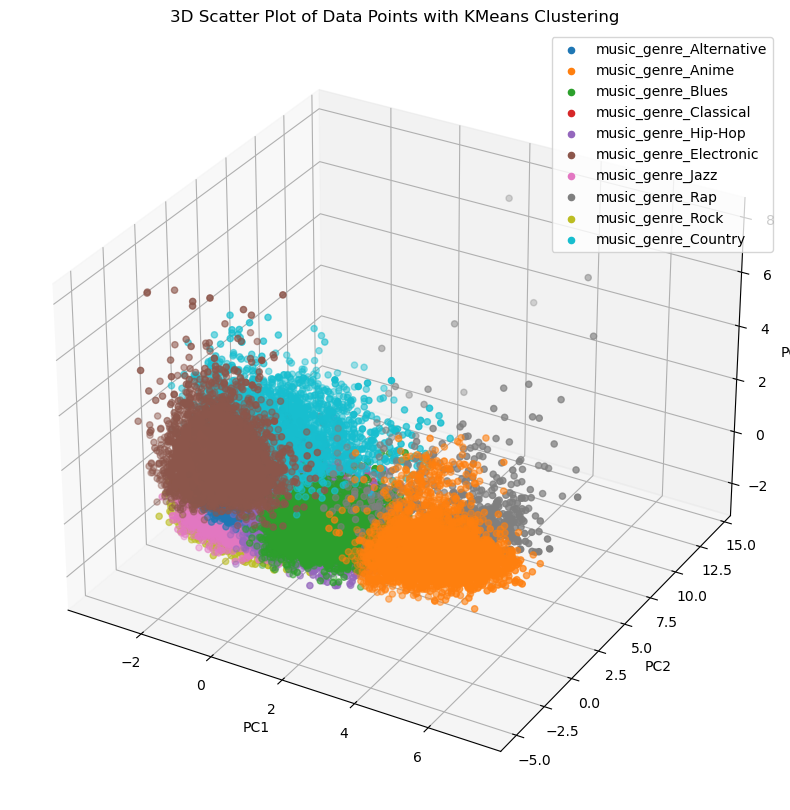

In [149]:
# # import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans

# # Sample data (replace with your actual data)
# # X = np.random.rand(100, 10)

# # Music genres (replace with your actual genres)
# genres = ['music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues','music_genre_Classical', 'music_genre_Hip-Hop','music_genre_Electronic', 'music_genre_Jazz', 'music_genre_Rap', 'music_genre_Rock' , 'music_genre_Country']

# # Compute PCA
# pca = PCA(n_components=3)
# X_pca = pca.fit_transform(X)

# # Perform KMeans clustering
# kmeans = KMeans(n_clusters=len(genres))
# cluster_labels = kmeans.fit_predict(X)

# # Create a figure and axis for the plot
# fig = plt.figure(figsize=(12, 10))
# ax = fig.add_subplot(111, projection='3d')

# # Assign colors to clusters
# colors = plt.cm.tab10(cluster_labels)

# # Plot the data points with color coding based on clusters
# ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors)

# # Set labels and title
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
# ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering')
# import numpy as np


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Sample data (replace with your actual data)
# X = np.random.rand(100, 10)

# Music genres (replace with your actual genres)
genres = ['music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues','music_genre_Classical', 'music_genre_Hip-Hop','music_genre_Electronic', 'music_genre_Jazz', 'music_genre_Rap', 'music_genre_Rock' , 'music_genre_Country']

# Compute PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=len(genres))
cluster_labels = kmeans.fit_predict(X)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to genres
color_map = plt.cm.get_cmap('tab10', len(genres))

# Plot the data points with color coding based on genres
for i, genre in enumerate(genres):
    indices = np.where(cluster_labels == i)[0]
    ax.scatter(X_pca[indices, 0], X_pca[indices, 1], X_pca[indices, 2], c=color_map(i), label=genre)

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering')

# Add legend
ax.legend()

# Show the plot
plt.show()


# # import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans

# # Sample data (replace with your actual data)
# # X = np.random.rand(1000, 10)  # Increase the number of data points

# # Music genres (replace with your actual genres)
# genres = ['music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues','music_genre_Classical', 'music_genre_Hip-Hop','music_genre_Electronic', 'music_genre_Jazz', 'music_genre_Rap', 'music_genre_Rock' , 'music_genre_Country']

# # Compute PCA
# pca = PCA(n_components=3)
# X_pca = pca.fit_transform(X)

# # Perform KMeans clustering
# kmeans = KMeans(n_clusters=len(genres))
# cluster_labels = kmeans.fit_predict(X)

# # Create a figure and axis for the plot
# fig = plt.figure(figsize=(12, 10))
# ax = fig.add_subplot(111, projection='3d')

# # Assign colors to clusters
# colors = plt.cm.tab10(cluster_labels)

# # Subsample the data for visualization
# subsample_indices = np.random.choice(range(len(X_pca)), size=500, replace=False)
# subsample_X_pca = X_pca[subsample_indices]
# subsample_colors = colors[subsample_indices]

# # Plot the subsampled data points with color coding based on clusters
# ax.scatter(subsample_X_pca[:, 0], subsample_X_pca[:, 1], subsample_X_pca[:, 2], c=subsample_colors, s=50, alpha=0.8)

# # Set labels and title
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
# ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering')

# # Adjust plot settings for better visibility
# ax.grid(True)
# ax.legend(genres)

# # Show the plot
# plt.show()






In [110]:
# TO INCLUDE FINDING THE EIGENVALUES AND PLOTTING THE ELBOW METHOD ... AND THEN DOING PCA as explained Umang 
# TO DO LIKE HW5 - MY CODE IS CORRECT - GET TEH EIGENVALUES - TO GET IDEAL NUMBER OF COMPONENTS AND ALSO PLOT SILHOUTTE 

# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # Create PCA object with the number of components you want to keep
# pca = PCA(n_components=4) 

# # Fit and transform the data to the new dimensionality
# X_pca = pca.fit_transform(X)

# # Plot the results
# plt.scatter(X_pca[:, 0], X_pca[:, 1])
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()

In [111]:
print(X_pca.shape) 

(49995, 3)


In the scatter plot, each point represents a song in a two-dimensional space defined by the first two principal components. You can use this plot to visually inspect if there are any clusters of songs that belong to a specific genre or if the songs are evenly distributed across the space. This can give you an idea of how well a machine learning model might be able to predict the genre based on the selected features.

#### Calculate the explained variance ratio for each principal component

You can also calculate the explained variance ratio for each principal component to see how much of the variance in the data is captured by each component. This can help you decide how many principal components to keep for your analysis.

In [150]:
# Compute the explained variance ratio for each principal component
explained_var_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i, var_ratio in enumerate(explained_var_ratio):
    print(f'Explained variance ratio for principal component {i+1}: {var_ratio:.3f}')

Explained variance ratio for principal component 1: 0.290
Explained variance ratio for principal component 2: 0.102
Explained variance ratio for principal component 3: 0.084


### tSNE
 t-SNE (t-Distributed Stochastic Neighbor Embedding) is a popular technique for dimensionality reduction, particularly for visualizing high-dimensional datasets in a lower-dimensional space. t-SNE maps the original high-dimensional data points into a lower-dimensional space while preserving the pairwise similarities between the points.

This code will compute t-SNE embeddings for different values of perplexity, and then plot the KL-divergence versus Perplexity. This can help us determine an appropriate value of perplexity to use for our 2D visualization.

In [113]:
# THIS CODE NOT WORKING 

# #  perform t-SNE on the data and plot the KL-divergence versus Perplexity
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# perplexities = range(5, 151, 5) # from 5 to 150 hops of 5 
# kls = []
# for p in perplexities:
#     tsne = TSNE(n_components=2, perplexity=p, random_state=42)
#     embedding = tsne.fit_transform(X)
#     kl_div = tsne.kl_divergence_
#     kls.append(kl_div)
    
# plt.plot(perplexities, kls)
# plt.xlabel('Perplexity')
# plt.ylabel('KL-divergence')
# plt.title('KL-divergence vs. Perplexity')
# plt.show()

In [114]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create t-SNE object with desired parameters
tsne = TSNE(n_components=2, random_state=42)

# Apply t-SNE on your data
X_tsne = tsne.fit_transform(X)

# Plot the results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization')
plt.show()


KeyboardInterrupt: 

In [ ]:
# # create a plot of the 2D component with a Perplexity of 20, we can modify the code as follows
# tsne = TSNE(n_components=2, perplexity=20, random_state=42)
# embedding = tsne.fit_transform(df_scaled)

# plt.scatter(embedding[:, 0], embedding[:, 1], cmap='viridis')
# plt.colorbar()
# plt.title('t-SNE Embedding (Perplexity=20)')
# plt.show()

# Model Development
 In this section, you can split the data into training and testing sets, choose and train a suitable machine learning model (such as a decision tree or a random forest), and evaluate the model's performance on the test set.

## Train test split 
According to the capstone project requirements we need to make sure to do the following train/test split: For *each* genre, use 500 randomly picked songs for the test set and the other 4500 songs from that genre for the training set. So the complete test set will be 5000x1 randomly picked genres (one per song, 500 from each genre). Use all the other data in the training set and make sure there is no leakage."

In [34]:
df_encoded

,music_genre_Alternative,music_genre_Anime,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock,...,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.108003,-0.883886,0.524878,-1.719534,1.289876,1.875809,-0.488113,0.638132,-0.185322,1.225073
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.850633,-0.860390,0.356933,-0.023001,1.097101,2.361357,-0.432433,0.339248,-0.627258,0.302431
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.043661,-0.888632,0.345737,-0.043830,0.586813,-0.521812,2.104140,0.732892,-0.582867,-0.498812
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.657606,-0.823184,1.207853,-0.422611,0.378918,-0.550300,-0.228269,0.752201,1.434452,-0.753752
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.786291,-0.883974,0.446504,0.008676,-0.048212,2.235361,-0.228269,0.465324,-0.515787,-0.539278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.693584,-0.895907,2.120353,0.446523,0.360018,-0.557976,0.625504,0.357259,0.398665,0.002976
49996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.822269,-0.791250,1.515752,0.069125,-0.622758,2.140095,-0.463366,-0.162624,-0.415168,0.557371
49997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.980432,-0.396625,0.160998,0.259899,0.420497,-0.558074,-0.426246,0.454940,3.219952,-0.304571
49998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.693584,0.491062,-0.247668,0.198339,0.492315,-0.558074,1.961844,0.104295,2.894419,0.982273


In [35]:
print(df_encoded.columns)
df_encoded.isnull().sum()

Index(['music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues',
       'music_genre_Classical', 'music_genre_Country',
       'music_genre_Electronic', 'music_genre_Hip-Hop', 'music_genre_Jazz',
       'music_genre_Rap', 'music_genre_Rock', 'key_A', 'key_A#', 'key_B',
       'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#',
       'key_G', 'key_G#', 'mode_Major', 'mode_Minor', 'obtained_date_0/4',
       'obtained_date_1-Apr', 'obtained_date_3-Apr', 'obtained_date_4-Apr',
       'obtained_date_5-Apr', 'instance_id', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness',
       'loudness', 'speechiness', 'valence'],
      dtype='object')


music_genre_Alternative    0
music_genre_Anime          0
music_genre_Blues          0
music_genre_Classical      0
music_genre_Country        0
music_genre_Electronic     0
music_genre_Hip-Hop        0
music_genre_Jazz           0
music_genre_Rap            0
music_genre_Rock           0
key_A                      0
key_A#                     0
key_B                      0
key_C                      0
key_C#                     0
key_D                      0
key_D#                     0
key_E                      0
key_F                      0
key_F#                     0
key_G                      0
key_G#                     0
mode_Major                 0
mode_Minor                 0
obtained_date_0/4          0
obtained_date_1-Apr        0
obtained_date_3-Apr        0
obtained_date_4-Apr        0
obtained_date_5-Apr        0
instance_id                0
popularity                 0
acousticness               0
danceability               0
duration_ms                0
energy        

In [36]:
print(df_encoded.isnull().sum())

music_genre_Alternative    0
music_genre_Anime          0
music_genre_Blues          0
music_genre_Classical      0
music_genre_Country        0
music_genre_Electronic     0
music_genre_Hip-Hop        0
music_genre_Jazz           0
music_genre_Rap            0
music_genre_Rock           0
key_A                      0
key_A#                     0
key_B                      0
key_C                      0
key_C#                     0
key_D                      0
key_D#                     0
key_E                      0
key_F                      0
key_F#                     0
key_G                      0
key_G#                     0
mode_Major                 0
mode_Minor                 0
obtained_date_0/4          0
obtained_date_1-Apr        0
obtained_date_3-Apr        0
obtained_date_4-Apr        0
obtained_date_5-Apr        0
instance_id                0
popularity                 0
acousticness               0
danceability               0
duration_ms                0
energy        

In [37]:
print('df_encoded: ', df_encoded.shape)


df_encoded:  (49995, 40)


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split

unique_genres = ['music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues',
                 'music_genre_Classical', 'music_genre_Country',
                 'music_genre_Electronic', 'music_genre_Hip-Hop', 'music_genre_Jazz',
                 'music_genre_Rap', 'music_genre_Rock']

train_sets = []
test_sets = []

test_size = 500

for genre in unique_genres:
    genre_data = df_encoded[df_encoded[genre] == 1]
    genre_samples = len(genre_data)
    
    if genre_samples >= test_size:
        train_samples = genre_samples - test_size
    else:
        train_samples = 0
    
    X_genre = genre_data.drop(columns=unique_genres)
    y_genre = genre_data[unique_genres]
    
    X_train_genre, X_test_genre, y_train_genre, y_test_genre = train_test_split(
        X_genre, y_genre, train_size=train_samples, test_size=test_size, random_state=42)
    
    train_sets.append(X_train_genre)
    test_sets.append(X_test_genre)
    train_sets.append(y_train_genre)
    test_sets.append(y_test_genre)

X_train = pd.concat([train_sets[i] for i in range(len(train_sets)) if i % 2 == 0], axis=0, ignore_index=True)
y_train = pd.concat([train_sets[i] for i in range(len(train_sets)) if i % 2 == 1], axis=0, ignore_index=True)
X_test = pd.concat([test_sets[i] for i in range(len(test_sets)) if i % 2 == 0], axis=0, ignore_index=True)
y_test = pd.concat([test_sets[i] for i in range(len(test_sets)) if i % 2 == 1], axis=0, ignore_index=True)

# Verify the dimensions
print("y_train shape:", y_train.shape)
print("X_train shape:", X_train.shape)
print("y_test shape:", y_test.shape)
print("X_test shape:", X_test.shape)


y_train shape: (44995, 10)
X_train shape: (44995, 30)
y_test shape: (5000, 10)
X_test shape: (5000, 30)


In [39]:
column_names = X_train.columns.tolist()

# Print the column names
print(column_names)

['key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor', 'obtained_date_0/4', 'obtained_date_1-Apr', 'obtained_date_3-Apr', 'obtained_date_4-Apr', 'obtained_date_5-Apr', 'instance_id', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']


Since you have already performed dimensionality reduction using PCA, you can try using a classification model such as a Random Forest Classifier or a Support Vector Machine (SVM) to classify the songs into their respective genres.

Random Forest is a powerful algorithm that combines multiple decision trees to achieve high accuracy. It can handle high-dimensional data and noisy data, making it a good choice for your project. You can use the **`RandomForestClassifier`** class from scikit-learn to implement this model.

SVM is another popular algorithm for classification that works well in high-dimensional spaces. It tries to find the best hyperplane that separates the data into different classes. Scikit-learn provides the **`SVC`** (Support Vector Classification) class for SVM classification.

## SVM (Support Vector Machines) 

Method: Loop through each genre and you get AUCs for each genre (corresponding to training for that genre against the others) and then make a huge plot with the ROC curve and the AUC for each genre against the other genres. 

Context: 
Support Vector Machines (SVM) is a popular algorithm used for both binary and multi-class classification tasks. It is particularly well-suited for multi-class classification when the number of classes is relatively small compared to the number of samples.

The main idea behind SVM is to find an optimal hyperplane that separates the different classes in the feature space. The goal is to maximize the margin between the hyperplane and the closest data points from each class. SVM can handle non-linear decision boundaries by using different types of kernel functions that transform the data into a higher-dimensional space.

There are different types of kernel functions that can be used in SVM, such as:

* Linear Kernel: It represents a linear transformation of the data without changing its dimensionality. It is suitable for linearly separable datasets.

* Polynomial Kernel: It uses a polynomial function to transform the data into a higher-dimensional space. It can handle some degree of non-linearity in the data.

* RBF (Radial Basis Function) Kernel: It transforms the data into an infinite-dimensional space and is capable of capturing complex non-linear relationships in the data.

By using different kernel functions, SVM can handle datasets with various degrees of non-linearity and find optimal decision boundaries.

Here are some reasons why SVM is commonly used for multi-class classification:
* Effective in high-dimensional spaces: SVM performs well even when the number of features is larger than the number of samples. This makes it suitable for datasets with a large number of features.

* Versatility in kernel functions: SVM allows the use of different kernel functions, such as linear, polynomial, and radial basis function (RBF), to handle linear and non-linear classification problems.

* Robust against overfitting: SVM uses the concept of margin maximization, which helps in avoiding overfitting. The margin allows for a certain tolerance of misclassification, promoting generalization to unseen data.

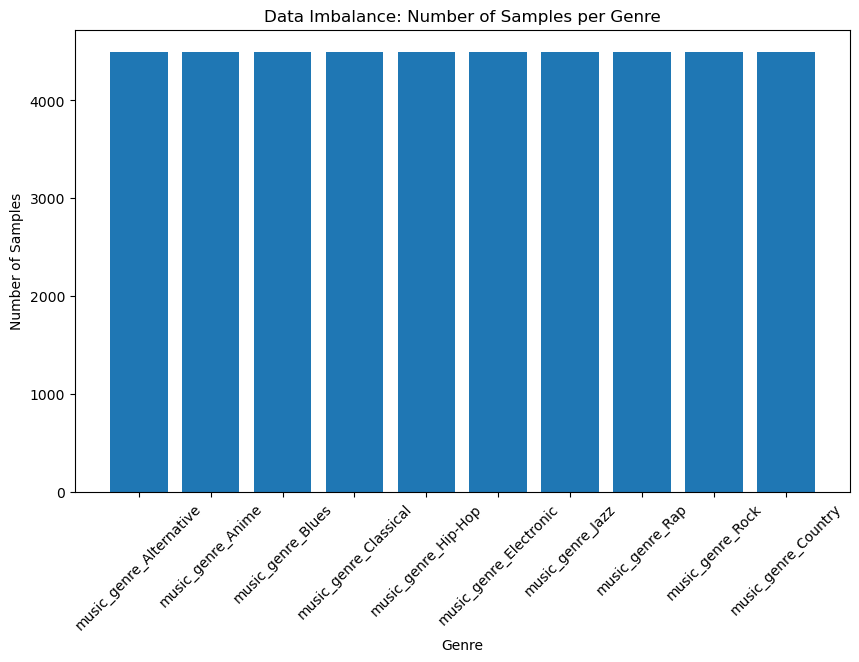

In [157]:
import matplotlib.pyplot as plt

# Count the number of samples for each genre in the training set
genre_counts = y_train.sum(axis=0)

# Plot the data imbalance
plt.figure(figsize=(10, 6))
plt.bar(genres, genre_counts)
plt.title('Data Imbalance: Number of Samples per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

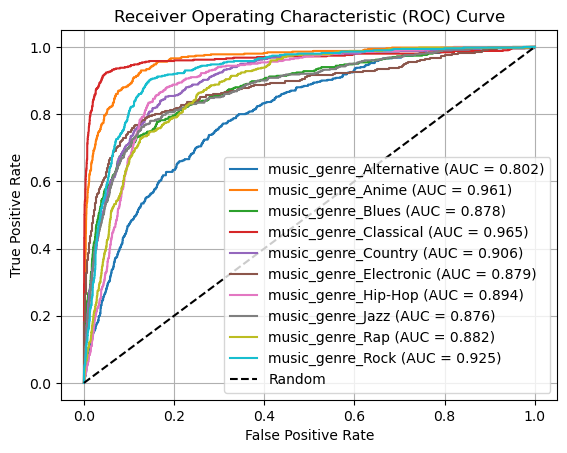

Genre: music_genre_Alternative
Precision: 0.910
Recall: 0.900
F1-Score: 0.853

Genre: music_genre_Anime
Precision: 0.947
Recall: 0.950
F1-Score: 0.947

Genre: music_genre_Blues
Precision: 0.911
Recall: 0.917
F1-Score: 0.895

Genre: music_genre_Classical
Precision: 0.966
Recall: 0.967
F1-Score: 0.966

Genre: music_genre_Country
Precision: 0.910
Recall: 0.900
F1-Score: 0.853

Genre: music_genre_Electronic
Precision: 0.924
Recall: 0.929
F1-Score: 0.917

Genre: music_genre_Hip-Hop
Precision: 0.854
Recall: 0.899
F1-Score: 0.857

Genre: music_genre_Jazz
Precision: 0.896
Recall: 0.912
F1-Score: 0.890

Genre: music_genre_Rap
Precision: 0.879
Recall: 0.902
F1-Score: 0.860

Genre: music_genre_Rock
Precision: 0.889
Recall: 0.908
F1-Score: 0.890

AUC Scores:
music_genre_Alternative: 0.802
music_genre_Anime: 0.961
music_genre_Blues: 0.878
music_genre_Classical: 0.965
music_genre_Country: 0.906
music_genre_Electronic: 0.879
music_genre_Hip-Hop: 0.894
music_genre_Jazz: 0.876
music_genre_Rap: 0.882
mu

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

genres = ['music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues',
          'music_genre_Classical', 'music_genre_Country',
          'music_genre_Electronic', 'music_genre_Hip-Hop', 'music_genre_Jazz',
          'music_genre_Rap', 'music_genre_Rock']

# Initialize dictionaries to store classification metrics and AUC scores
metrics = {genre: {} for genre in genres}
auc_scores = {}

# Train and test the SVM models for each genre
for genre in genres:
    # Get the training and testing data
    X_train_genre = X_train
    y_train_genre = y_train[genre]
    X_test_genre = X_test
    y_test_genre = y_test[genre]
    
    # Train the SVM model
    clf = SVC(probability=True)
    clf.fit(X_train_genre, y_train_genre)
    
    # Test the SVM model
    y_pred = clf.predict(X_test_genre)
    y_prob = clf.predict_proba(X_test_genre)[:, 1]
    
    # Compute classification metrics
    report = classification_report(y_test_genre, y_pred, output_dict=True, zero_division=1)
    metrics[genre]['precision'] = report['weighted avg']['precision']
    metrics[genre]['recall'] = report['weighted avg']['recall']
    metrics[genre]['f1-score'] = report['weighted avg']['f1-score']
    
    # Compute AUC score
    auc_scores[genre] = roc_auc_score(y_test_genre, y_prob)
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test_genre, y_prob)
    plt.plot(fpr, tpr, label=f'{genre} (AUC = {auc_scores[genre]:.3f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
# Plot settings
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print classification metrics
for genre in genres:
    print(f"Genre: {genre}")
    print(f"Precision: {metrics[genre]['precision']:.3f}")
    print(f"Recall: {metrics[genre]['recall']:.3f}")
    print(f"F1-Score: {metrics[genre]['f1-score']:.3f}")
    print("")

# Print AUC scores
print("AUC Scores:")
for genre in genres:
    print(f"{genre}: {auc_scores[genre]:.3f}")

After using SVM, there are several other machine learning algorithms that you can try for multi-class classification. Here are a few popular ones:

Random Forest: Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It can handle both numerical and categorical features, and it often provides good performance with minimal hyperparameter tuning.

# Random Forest 
Random Forest: Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It can handle both numerical and categorical features, and it often provides good performance with minimal hyperparameter tuning.

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a Random Forest model for each genre
rf_models = {}
for genre in genres:
    rf_models[genre] = RandomForestClassifier(n_estimators=100)

# Train and test the Random Forest models for each genre
for genre in genres:
    # Get the training and testing data
    X_train_genre = X_train
    y_train_genre = y_train[genre]
    X_test_genre = X_test
    y_test_genre = y_test[genre]
    
    # Train the Random Forest model
    rf_models[genre].fit(X_train_genre, y_train_genre)
    
    # Test the Random Forest model
    y_pred = rf_models[genre].predict(X_test_genre)
    
    # Evaluate the model
    report = classification_report(y_test_genre, y_pred)
    print(f"Genre: {genre}")
    print(report)


In [ ]:
%%time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

genres = ['music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues',
          'music_genre_Classical', 'music_genre_Country',
          'music_genre_Electronic', 'music_genre_Hip-Hop', 'music_genre_Jazz',
          'music_genre_Rap', 'music_genre_Rock']

# Initialize dictionaries to store classification metrics and AUC scores
metrics = {genre: {} for genre in genres}
auc_scores = {}

# Train and test the Random Forest models for each genre
for genre in genres:
    # Get the training and testing data
    X_train_genre = X_train
    y_train_genre = y_train[genre]
    X_test_genre = X_test
    y_test_genre = y_test[genre]
    
    # Train the Random Forest model
    clf = RandomForestClassifier()
    clf.fit(X_train_genre, y_train_genre)
    
    # Test the Random Forest model
    y_pred = clf.predict(X_test_genre)
    y_prob = clf.predict_proba(X_test_genre)[:, 1]
    
    # Compute classification metrics
    report = classification_report(y_test_genre, y_pred, output_dict=True)
    metrics[genre]['precision'] = report['weighted avg']['precision']
    metrics[genre]['recall'] = report['weighted avg']['recall']
    metrics[genre]['f1-score'] = report['weighted avg']['f1-score']
    
    # Compute AUC score
    auc_scores[genre] = roc_auc_score(y_test_genre, y_prob)
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test_genre, y_prob)
    plt.plot(fpr, tpr, label=f'{genre} (AUC = {auc_scores[genre]:.3f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print classification metrics
for genre in genres:
    print(f"Genre: {genre}")
    print(f"Precision: {metrics[genre]['precision']:.3f}")
    print(f"Recall: {metrics[genre]['recall']:.3f}")
    print(f"F1-Score: {metrics[genre]['f1-score']:.3f}")
    print("")

# Print AUC scores
print("AUC Scores:")
for genre in genres:
    print(f"{genre}: {auc_scores[genre]:.3f}")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# # Train the Random Forest model
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)

# Visualize individual decision trees
fig, axes = plt.subplots(nrows=1, ncols=len(clf.estimators_), figsize=(20, 5))
for i, estimator in enumerate(clf.estimators_):
    tree.plot_tree(estimator, ax=axes[i])
    axes[i].set_title(f'Decision Tree {i+1}')

plt.show()

In [ ]:
# Logistic Regression 

In [ ]:
# ADABOOST 

## Neural Networks

In [ ]:
!pip show tensorflow

In [ ]:
# This will display the path to the currently active Python interpreter. 
# Check if it matches the environment where you installed TensorFlow.
import sys
print(sys.executable)

In [ ]:
pwd

In [ ]:
conda activate cs473


In [ ]:
# TO DO: JESSIE tried different layers for neural networks ... => A FAIRE !!!! 

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# from tensorflow import keras
from tensorflow.keras import layers

# Load the data
data = pd.read_csv("musicData.csv")

# Drop columns that are not relevant for classification
data = data.drop(columns=["song_id", "artist_name", "song_name", "obtained_date"])

# Split features and labels
X = data.drop(columns=["genre"])
y = data["genre"]

# Encode the genre labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(len(label_encoder.classes_), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# this makes the kernel die ... too much data 


# Model Tuning
In this section, you can fine-tune the hyperparameters of the model to achieve better performance. You can use techniques such as grid search or random search to find the best combination of hyperparameters.

# Model Evaluation
Evaluate your model's performance on the testing set, and report any metrics that are relevant to your problem. This might include things like accuracy, precision, recall, F1 score, or ROC-AUC.

# Model Interpretation
Finally, interpret your model's results and draw conclusions from your analysis. This might involve analyzing feature importance, visualizing the model's predictions, or exploring the decision boundaries of the model.

# Extra Credit 
Building a model that predicts multiple genres for a song or experimenting with different machine learning algorithms to see which one performs best